In [1]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Encode target labels
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Fitur dan target
X = df.drop('species', axis=1)
y = df['species']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ubah ke tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [4]:
class IrisMLP(nn.Module):
    def __init__(self):
        super(IrisMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.model(x)

In [5]:
model = IrisMLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
losses = []
for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 1.0140
Epoch [20/100], Loss: 0.7846
Epoch [30/100], Loss: 0.5275
Epoch [40/100], Loss: 0.3593
Epoch [50/100], Loss: 0.2640
Epoch [60/100], Loss: 0.1976
Epoch [70/100], Loss: 0.1503
Epoch [80/100], Loss: 0.1191
Epoch [90/100], Loss: 0.0994
Epoch [100/100], Loss: 0.0865


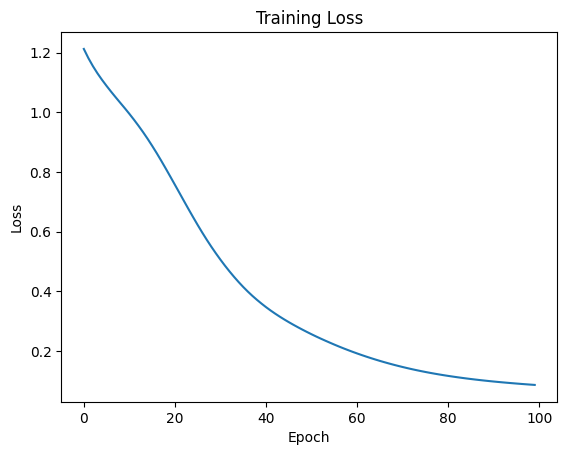

In [6]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [7]:
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    acc = accuracy_score(y_test, predicted)
    print("Akurasi pada data test:", acc)

Akurasi pada data test: 0.9666666666666667


In [8]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_preds)
print("Akurasi Logistic Regression:", lr_acc)

Akurasi Logistic Regression: 1.0


In [9]:
torch.save(model.state_dict(), "model.pth")